# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import stats
df = pd.read_csv('data/human_body_temperature.csv')
df.columns

Index(['temperature', 'gender', 'heart_rate'], dtype='object')

# Problem 1

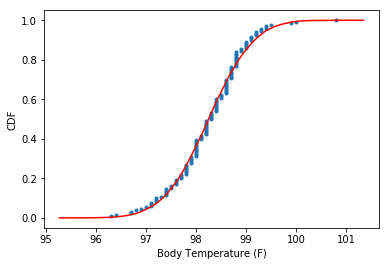

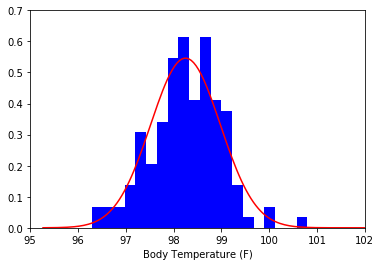

The distribution kurtosis = 0.7049597854114693 and skew = -0.004367976879081625
The data comes from a normal distribution: do not reject null hypothesis


In [6]:
#1 Is the body temperature normally distributed?
#Create a function for a CDF 
def cdf(data):
    x = np.sort(data)
    inds = np.arange(1,len(x)+1)
    y = inds/len(x)
    
    return x, y

#Calculate the CDF for the body temperature data along with a series of data for a random normal
#distribution about the mean and standard deviation of the body temperature data
x, y = cdf(df.temperature)

mu = np.mean(df.temperature)
sigma = np.std(df.temperature)
kur = stats.kurtosis(df.temperature)
sk = stats.skew(df.temperature)
datanorm= np.random.normal(mu, sigma, 10000)
xnew = np.arange(min(datanorm), max(datanorm) + 1, .05)
datanew = 1/np.sqrt(2*math.pi*sigma**2)*np.exp(-(xnew-mu)**2/(2*sigma**2))

xnorm, ynorm = cdf(datanorm)

#Plot a CDF of the body temperature data along with with a pure normal distribution
plt.plot(x,y, marker = '.', linestyle = 'none')
plt.plot(xnorm, ynorm, color = 'red')
plt.xlabel('Body Temperature (F)')
plt.ylabel('CDF')

plt.show()

#Plot histogram of the body temperature along with a pure normal distribution of the data
datanorm = pd.Series(datanorm)
_ = plt.hist(df.temperature, color = 'blue', bins = 20, density =True)
#_ = datanorm.plot.kde(color = 'red')
plt.xlabel('Body Temperature (F)')
plt.plot(xnew, datanew, color = 'red')
plt.axis([95, 102, 0, 0.7])
plt.show()

#Use the normaltest in scipy stats package to compare find if the data 
#is drawn from a normal distribution
alpha = 0.05 #Cutoff limit to determine if p-value is sufficient for data to be guassian
#Calculate a test statistic for normal test
k2, p = stats.normaltest(df.temperature)
print('The distribution kurtosis =', kur, 'and skew =', sk)
if p > alpha: #null hypothesis: data comes from normal distribution
    print('The data comes from a normal distribution: do not reject null hypothesis')
else:
    print('The data does not come from the normal distribution: reject null hypothesis using normal test')

## Problem 1 explaination
The CDF shows that the body temperature data is closely related to a normal distribution.  This is somewhat less obvious when looking at a histogram of the data, which only slightly normally distributed.  When we look at measurements such as kurtosis and skewness we see that the skewness is very close to zero and therefore is indicative of a normal distribution.  The kurtosis on the other hand is moderately large and should be zero for a normal distribution.  From these two measurements one could conclude that the distribution appears approximately normal.  However, if we use python's built in stats.normaltest function which uses the kurtosis and skew in the D'Agostino's K^2 test at set alpha = 0.05 then we find that we fail to reject the null hypothesis therefore the data comes from the normal distribution.

# Problem 2

Number of data points is 130
The sample mean is 98.24923076923078 and the bootstramp mean of means is 98.24937784615385


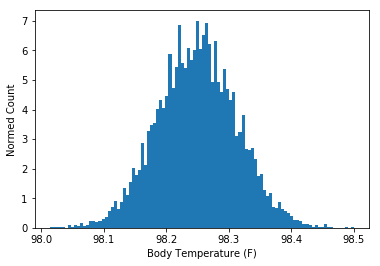

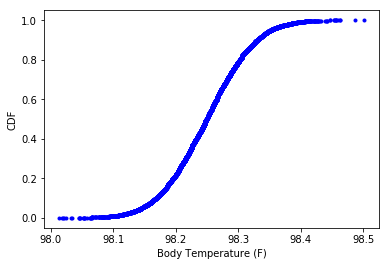

In [164]:
#2 Is this dataset large and does it statistfy that observations are independent?
temp_len = len(df.temperature)
print('Number of data points is',temp_len)

#Create a function to test the mean of a bootstrap samples to ensure it is of a guassian shape
def bs_func(data, func, size = 1):
    bs_funcs = np.empty(size)
    for index in range(size):
        temp = np.random.choice(data, size=len(data))
        bs_funcs[index] = func(temp)
    
    return bs_funcs

bs_mean = bs_func(df.temperature, np.mean, 10000)
x_bs_mean, y_bs_mean = cdf(bs_mean)

#Compare the mean of the sample to the average mean of the bootstrap sample means
mu_bs = np.mean(bs_mean)
print('The sample mean is', mu, 'and the bootstramp mean of means is', mu_bs)
#Display histogram of the bs means
plt.hist(bs_mean, bins=100, density = True)
plt.xlabel('Body Temperature (F)')
plt.ylabel('Normed Count')
plt.show()
#Show CDF of the bs means
plt.plot(x_bs_mean, y_bs_mean, color='blue', marker='.', linestyle='none')
plt.xlabel('Body Temperature (F)')
plt.ylabel('CDF')
plt.show()

## Problem 2 explaination
The number of data points in the data set is 130 which exceeds the 30 data points needed for the data to satisfy the central limit theorem.  Also, the observations can certainly be considered independent since it is assumed that the body temperature measurements were taken from different people from a large population.  It is reasonable to assume that the population is large enough that 130 measurements is less that 10% of the total population.

# Problem 3


## Bootstrap hypothesis test

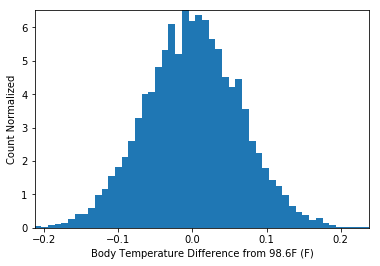

The temperature difference between the sample mean and 98.6F is  -0.35076923076921673 F
The p-value is 0.0


In [161]:
#The bootstrap method first requires the data to be shifted and make a function that draws bootstrap
#samples with the difference between the mean and the expected value
def bs_diff_test(data, bt_test, size = 1):
    bs_diff = np.empty(size)
    
    for index in range(size):
        temp = np.random.choice(data, size=len(data))
        bs_diff[index] = np.mean(temp) - bt_test
    return bs_diff

bt_test = 98.6
temperature_diff = np.mean(df.temperature) - bt_test
temperature_shifted = df.temperature - np.mean(df.temperature) + bt_test

bs_diff = bs_diff_test(temperature_shifted, bt_test, 10000)
bin1 = plt.hist(bs_diff, density = True, bins = 50)

plt.plot([temperature_diff, temperature_diff], [0, max(bin1[0])], color = 'red')
plt.axis([min(bin1[1]), max(bin1[1]), 0, max(bin1[0])])
plt.xlabel('Body Temperature Difference from 98.6F (F)')
plt.ylabel('Count Normalized')
plt.show()

p = np.sum(bs_diff <= temperature_diff)/len(bs_diff)
print('The temperature difference between the sample mean and 98.6F is ', temperature_diff,'F')
print('The p-value is', p)

Bootstramp hypothesis testing shows that when the temperature data is shifted to have a mean of 98.6F and then a bootstrap sampling is used then the p-value associated with getting a temperature difference of -0.351F is p = 0.0.  Hence, we can reject the null hypothesis that the temperature mean is 98.6F.

## Frequentist statistical testing
A one sample test should be used because we have one data sample and one single number to compare; in this case we have the body temperature data and the expected mean body temperature value.  There are a large number of samples, 130 data points, however we do not know the population variance therefore we must use s t statistic.

In [217]:
#Calculate the T statistic using the sample mean and standard deviation
from scipy import stats

T = (mu - bt_test)/(sigma/np.sqrt(temp_len))
p_t = stats.t.cdf(T, df=temp_len - 1)

print('The T statistic is', T,'and the p-value is', 2*p_t)

Z = (mu - bt_test)/(sigma/np.sqrt(temp_len))
p_z = stats.norm.cdf(Z)

print('The Z statistic is', T,'and the p-value is', 2*p_z)

The T statistic is -5.475925202078116 and the p-value is 2.1887464624095175e-07
The Z statistic is -5.475925202078116 and the p-value is 4.3523151658821886e-08


The t testing gave a very small p-value and we can conclude that the null hypothesis fails.  We find that using both the t and Z statistic shows a small p-value but the p-value of the Z-statistic is smaller than the p-value of the t statistic.  This is because the t statistic accounts for estimations in the population variance therefore the p-value will be naturally larger than when the variance is exactly known.

# Problem 4

In [220]:
#Draw a random sample size of 10 from temperature data 
temp_sample = df.temperature.sample(n=10, replace = False)
mu_sample = np.mean(temp_sample)
sigma_sample = np.std(temp_sample)

Statistic = (mu_sample - bt_test)/(sigma_sample/np.sqrt(10))

p_t = stats.t.cdf(Statistic, df=10 - 1)

print('The T statistic is', Statistic,'and the p-value is', 2*p_t)

p_z = stats.norm.cdf(Statistic)

print('The Z statistic is', Statistic,'and the p-value is', 2*p_z)

The T statistic is -2.120472324199871 and the p-value is 0.06298923205780911
The Z statistic is -2.120472324199871 and the p-value is 0.03396623308713349


The correct test is use is the t statistic because the sample size is small (10 data points) and the population variance is unknown.

# Problem 5

In [224]:
#Use the bootstrap method to find the confidence interval for the data 
#sample mean.  This was already found in problem 2 and can be used to find the 
#95% confindence interval here
def bs_func2(data, func, size = 1):
    bs_funcs = np.empty(size)
    for index in range(size):
        temp = np.random.choice(data, size=1)
        bs_funcs[index] = func(temp)
    
    return bs_funcs

bs_mean = bs_func2(df.temperature, np.mean, 100000)
bs_conf_int = np.percentile(bs_mean, [2.5, 97.5])
bs_sigma = np.std(bs_mean)

t_95 = stats.t.ppf(0.975, df = temp_len-1)
fs_conf_int = mu + np.array([-sigma*t_95, sigma*t_95])

print('The bootstrap mean', np.mean(bs_mean))
print('The boostrap standard deviation is', bs_sigma)
print('The bootstrap method gives a 95% confidence interval :', bs_conf_int)

print('The frequentist mean is', mu)
print('The frequentist standard deviation is', sigma)
print('The frequentist method gives a 95% confidence interval :', fs_conf_int)


The bootstrap mean 98.248103
The boostrap standard deviation is 0.7291667857157235
The bootstrap method gives a 95% confidence interval : [96.7 99.5]
The frequentist mean is 98.24923076923078
The frequentist standard deviation is 0.7303577789050377
The frequentist method gives a 95% confidence interval : [96.80420002 99.69426152]


When we take an N=1 draw and calculate the 95% confidence interval using the bootstrap and frequentist methods we find that abnormal temperatures are those lying outside the range of 96.7-99.5F or 96.8-99.7F respectively.

# Problem 6
Lets start by graphically looking at the distribution of temperatures for women versus men.

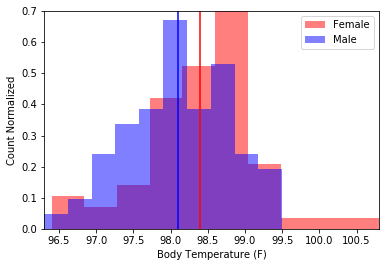

In [174]:
temp_F = df[df.gender == 'F'].temperature
temp_M = df[df.gender == 'M'].temperature

F_mean = np.mean(temp_F)
M_mean = np.mean(temp_M)

bins1 = plt.hist(temp_F, color = 'red', alpha = 0.5, density = True)
bins2 = plt.hist(temp_M, color = 'blue', alpha = 0.5, density = True)
plt.legend(['Female', 'Male'], loc ='upper right')

plt.plot([F_mean, F_mean], [0, 1000], color = 'red')
plt.plot([M_mean, M_mean], [0, 1000], color = 'blue')
min(np.concatenate((bins1[1], bins2[1])))
plt.axis([min(np.concatenate((bins1[1], bins2[1]))),
          max(np.concatenate((bins1[1], bins2[1]))),
          0, 
          max(np.concatenate((bins1[0], bins2[0])))])

plt.xlabel('Body Temperature (F)')
plt.ylabel('Count Normalized')
plt.show()

Initial impressions show that both male and female distributions are highly overlaying.  The mean temperature (shown as vertical lines) shows that female body temperature is on average higher than male body temperature.

## Bootstrap method

The p-value is 0.02


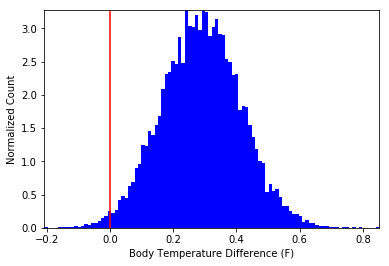

The 95% confidence interval is [0.04461538 0.53538462]


In [226]:
#Write function to calculate boostrap method for difference between the two
#means.
def bs_mean2(data1, data2, size = 1):
    diff_mean = np.empty(size)
    
    for index in range(size):
        temp1 = np.random.choice(data1, size=len(data1))
        temp2 = np.random.choice(data2, size=len(data2))
        
        diff_mean[index] = np.mean(temp1) - np.mean(temp2)
    return diff_mean
#Find the distribution of the difference between the means using bootstrap
bs_diff =bs_mean2(temp_F, temp_M, 20000)

#Find the p-value with the null hypothesis that the difference between the 
#means is 0.
p_diff = np.sum(bs_diff <= 0)/len(bs_diff)
print('The p-value is', 2*p_diff)

binsdiff = plt.hist(bs_diff, bins = 100, color = 'blue', density = True)

plt.plot([0, 0], [0, 100000], color = 'red')
plt.axis([min(binsdiff[1]), max(binsdiff[1]), 0, max(binsdiff[0])])
plt.xlabel('Body Temperature Difference (F)')
plt.ylabel('Normalized Count')
plt.show()


print('The 95% confidence interval is', np.percentile(bs_diff, [2.5, 97.5]))

Here we make the null hypothesis that the difference between the mean body temperatures from females to males is 0.  Thus, both men and women are considered to have the same body temperature on average.  Here we find a p-value much lower than 0.05 which suggests that we can reject the null hypothesis and say that there is a difference in body temperature between females and males.  This can also be seen when you look at the 95% confidence interval.  Because the confidence interval does not contain 0 there is a high probability that the body temperatures are different.  In particular, females have a slightly higher body temperature than males.

## Frequentist method

In [225]:
#Calculate the mean and standard deviation for the data sets
F_std = np.std(temp_F)
M_std = np.std(temp_M)

#Calculate the statistics for the difference between the data sets
mean_diff = F_mean - M_mean
std_diff = np.sqrt(F_std**2/len(temp_F)+M_std**2/len(temp_M))
t_diff = mean_diff/std_diff

p_t_diff = 1-stats.t.cdf(t_diff, df= min([len(temp_F), len(temp_M)]) - 1)
p_z_diff = 1-stats.norm.cdf(t_diff)

print('The p-value from a t test is', 2*p_t_diff)
print('The p-value from a z test is', 2*p_z_diff)

The p-value from a t test is 0.024526425958323994
The p-value from a z test is 0.021266451830129318


We recover a similar p-value as to what was seen in the boostrap method.  Thus, we can conclude that the null hypothesis can be rejected and say that there is a difference between the mean body temperatures from females to males.  Note, both the p-values from the t and z test is shown.  In this case, we only have the sample standard deviation and therefore we must use the t test since we lack the population variance.